#### Chemical reaction kinetics

For the following chemical reactions: \
$A + B$ &rarr; $2C$ \
$2B + C$ &rarr; $D$ 

$\frac{\ dA}{\ dt} = -k_1 AB$ \
$\frac{\ dB}{\ dt} = -k_1 AB - 2k_2 B^2C$ \
$\frac{\ dC}{\ dt} = 2k_1 AB - k_2 B^2C$ \
$\frac{\ dD}{\ dt} = k_2 B^2C$ 

**where**, \
$\frac{\ d\_}{\ dt}$ - rate of change \
$k\_$ - rate constant \
$A/B/C/D$ - concentrations

**For Gillesspie:** \
$A$ &rarr; $A - 1$ at a rate $ k_1 AB$ \
$B$ &rarr; $B - 1$ at a rate $ k_1 AB$ \
$C$ &rarr; $C + 2$ at a rate $ k_1 AB$ \
$B$ &rarr; $B - 2$ at a rate $ k_2 B^2C$ \
$C$ &rarr; $C - 1$ at a rate $ k_2 B^2C$ \
$D$ &rarr; $D + 1$ at a rate $ k_2 B^2C$ 


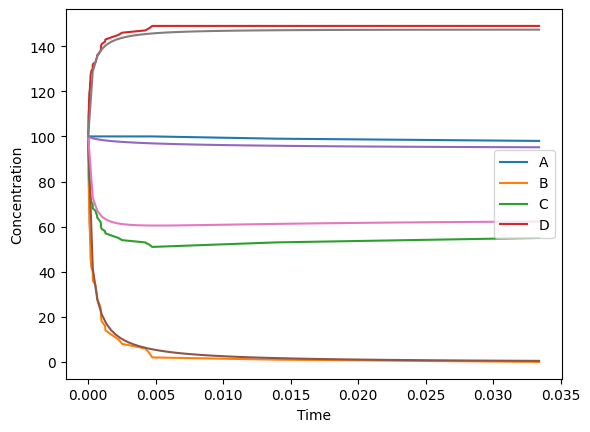

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

A = [100]
B = [100]
C = [100]
D = [100]

k1 = 0.4
k2 = 0.25

t = [0]
t_end = 50

while t[-1] < t_end:

    rates = [k1*A[-1]*B[-1], k2*B[-1]**2*C[-1]]
    ratesum = sum(rates)

    if ratesum <= 0:
        break

    tau = np.random.exponential(scale = 1/ratesum)
    t.append(t[-1] + tau)

    rand = random.uniform(0,1)

    if rand*ratesum <= rates[0]:
        A.append(A[-1]-1)
        B.append(B[-1]-1)
        C.append(C[-1]+2)
        D.append(D[-1])

    elif rand*ratesum > rates[0] and rand*ratesum <= rates[0]+rates[1]:
        A.append(A[-1])
        B.append(B[-1]-2)
        C.append(C[-1]-1)
        D.append(D[-1]+1)

A_plt, = plt.plot(t,A, label="A")
B_plt, = plt.plot(t,B, label="B")
C_plt, = plt.plot(t,C, label="C")
D_plt, = plt.plot(t,D, label="D")

plt.legend(handles=[A_plt, B_plt, C_plt, D_plt])

plt.xlabel('Time')
plt.ylabel('Concentration')

t = np.linspace(0, t[-1],num=100)
y0 = [100, 100, 100, 100]    #A, B, C, D
pars = [k1, k2]

def sim(vars, t, pars):
    
    A = vars[0]
    B = vars[1]
    C = vars[2]
    D = vars[3]

    k1 = pars[0]
    k2 = pars[1]

    dadt = -k1*A*B
    dbdt = -k1*A*B - 2*k2*B**2*C
    dcdt = 2*k1*A*B - k2*B**2*C
    dddt = k2*B**2*C

    return([dadt, dbdt, dcdt, dddt])

y = odeint(sim,y0, t, args=(pars,))

plt.plot(t, y[:,0]) #A
plt.plot(t, y[:,1]) #B
plt.plot(t, y[:,2]) #C
plt.plot(t, y[:,3]) #D

plt.show()
